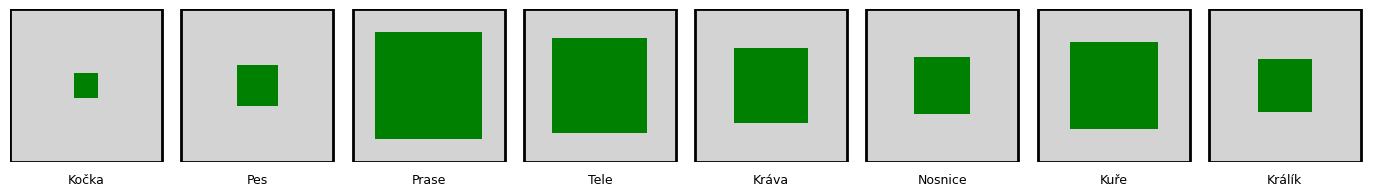

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Konstantní velikost prostoru na obrázku (vizuálně sjednocený prostor)
fixni_vel = 200 

# Seznam zvířat: (jméno, velikost prostoru v m², odhadovaná plocha těla v m², skutečný prostor)
animals = [
    ("Kočka", 6, 0.15),
    ("Pes", 5.5, 0.4),
    ("Prase", 1, 0.5),
    ("Tele", 1.8, 0.7),
    ("Kráva", 5, 1.2),
    ("Nosnice", 0.11, 0.015),
    ("Kuře", 0.03, 0.01),
    ("Králík", 0.2, 0.025),
]

# Najdeme největší skutečný prostor pro poměrové škálování těla
max_space = max(space for _, space, _ in animals)
scale = (fixni_vel ** 2) / max_space  # přepočítáme scale podle max prostoru

fig, ax = plt.subplots(figsize=(14, 7))
x_offset = 0

for name, space_area, body_area in animals:
    # Tělo se škáluje podle skutečného poměru vůči prostoru
    body_side = ((body_area / space_area) * (fixni_vel ** 2)) ** 0.5

    # Vnější čtverec - prostor (všude stejný)
    rect_space = patches.Rectangle((x_offset, 0), fixni_vel, fixni_vel,
                                   linewidth=2, edgecolor='black', facecolor='lightgrey')
    ax.add_patch(rect_space)

    # Vnitřní čtverec - tělo zvířete
    center_x = x_offset + fixni_vel / 2
    center_y = fixni_vel / 2
    rect_body = patches.Rectangle((center_x - body_side / 2, center_y - body_side / 2),
                                  body_side, body_side,
                                  linewidth=1.5, edgecolor='none', facecolor='green')
    ax.add_patch(rect_body)
    ax.text(center_x, -15, name, ha='center', va='top', fontsize=9)
    x_offset += fixni_vel + 25

# Nastavení osy
ax.set_xlim(0, x_offset)
ax.set_ylim(0, fixni_vel)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()
